# IGRF

International Geomagnetic Reference Field IGRF python wrapper

In [1]:
import igrf
import datetime
import numpy as np

### B from 0 to 1000 km above PFISR on July 14, 2021 at 0 UT

In [2]:
dtimeIGRF = datetime.datetime(2021,7,14,0,0,0)
glat = 65.12992
glon = -147.47104
alt_km = np.arange(0,1000,10)
B_profile = igrf.igrf(time=dtimeIGRF,
          glat = glat,
          glon = glon,
          alt_km = alt_km)

In [3]:
B_profile

<xarray.Dataset>
Dimensions:  (alt_km: 100)
Coordinates:
  * alt_km   (alt_km) int64 0 10 20 30 40 50 60 ... 930 940 950 960 970 980 990
Data variables:
    north    (alt_km) float64 1.19e+04 1.185e+04 ... 7.884e+03 7.852e+03
    east     (alt_km) float64 3.544e+03 3.522e+03 ... 2.073e+03 2.062e+03
    down     (alt_km) float64 5.513e+04 5.487e+04 ... 3.598e+04 3.583e+04
    total    (alt_km) float64 5.651e+04 5.624e+04 ... 3.689e+04 3.674e+04
    incl     (alt_km) float64 77.31 77.3 77.3 77.3 ... 77.23 77.23 77.23 77.23
    decl     (alt_km) float64 16.58 16.55 16.53 16.5 ... 14.75 14.74 14.73 14.72
Attributes:
    time:     2021-07-14 00:00:00
    isv:      0
    itype:    1
    glat:     65.12992
    glon:     -147.47104

# IRI2016

The International Reference Ionosphere (IRI) provides monthly averages of the electron density, electron temperature, ion temperature, and ion composition in the ionospheric altitude range

computing IRI altitude profile over time range for fixed lat/lon

In [4]:
import iri2016.profile as iri
import datetime

tlim = (datetime.datetime(2020, 7, 14, 0, 0, 0),datetime.datetime(2020, 7, 15))
dt = datetime.timedelta(minutes=30)
altkmrange = (100,500,10.)
glat = 65.12992
glon = -147.47104
iri_profile = iri.timeprofile(
     tlim = tlim,
     dt   = dt,
     altkmrange = altkmrange,
    glat = glat,
    glon = glon,
)

In [5]:
iri_profile

<xarray.Dataset>
Dimensions:         (alt_km: 41, time: 48)
Coordinates:
  * time            (time) datetime64[ns] 2020-07-14 ... 2020-07-14T23:30:00
  * alt_km          (alt_km) float64 100.0 110.0 120.0 ... 480.0 490.0 500.0
    glat            float64 65.13
    glon            float64 -147.5
Data variables: (12/20)
    ne              (time, alt_km) float64 8.239e+10 1.056e+11 ... 1.092e+11
    Tn              (time, alt_km) float64 233.2 248.2 355.2 ... 824.8 824.8
    Ti              (time, alt_km) float64 233.2 248.2 ... 1.634e+03 1.664e+03
    Te              (time, alt_km) float64 233.2 248.2 ... 2.789e+03 2.808e+03
    nO+             (time, alt_km) float64 9.581e+05 1.874e+07 ... 1.024e+11
    nH+             (time, alt_km) float64 0.0 0.0 0.0 ... 1.54e+09 1.618e+09
    ...              ...
    hmF1            (time) float64 214.6 212.0 209.3 206.5 ... 221.2 219.3 217.1
    NmE             (time) float64 1.056e+11 1.028e+11 ... 1.095e+11 1.079e+11
    hmE             (time) float64 110.0 110.0 110.0 110.0 ... 110.0 110.0 110.0
    TEC             (time) float64 8.52e+16 8.533e+16 ... 8.477e+16 8.505e+16
    EqVertIonDrift  (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    foF2            (time) float64 5.21 5.228 5.253 5.284 ... 5.165 5.182 5.196
Attributes:
    f107:     [73.9706573, 73.9706573, 73.9706573, 73.9706573, 73.9706573, 73...
    ap:       [-11.0, -11.0, -11.0, -11.0, -11.0, -11.0, -11.0, -11.0, -11.0,...

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


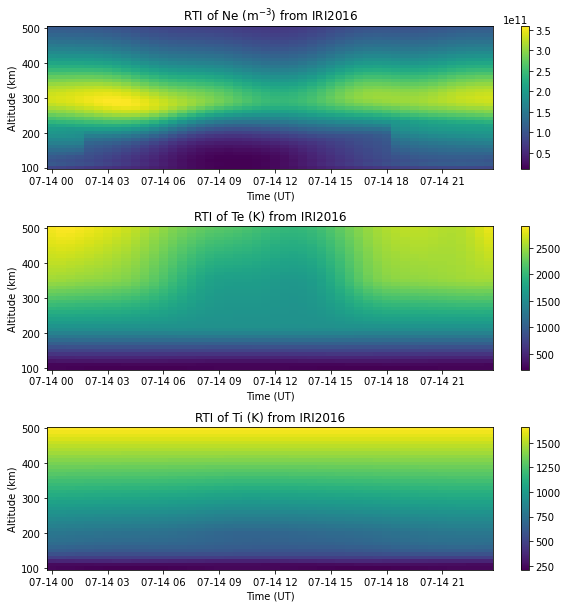

In [7]:
fig,axs = plt.subplots(nrows=3,figsize=(10,10), gridspec_kw=dict(hspace=0.4))
ax = axs[0]
pcm = ax.pcolormesh(iri_profile.coords['time'], iri_profile.coords['alt_km'],
             iri_profile.data_vars['ne'].T,shading='auto')
fig.colorbar(pcm, ax=ax)
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Altitude (km)')
ax.set_title(r"RTI of Ne (m$^{-3}$) from IRI2016");

ax = axs[1]
pcm = ax.pcolormesh(iri_profile.coords['time'], iri_profile.coords['alt_km'],
             iri_profile.data_vars['Te'].T,shading='auto')
fig.colorbar(pcm, ax=ax)
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Altitude (km)')
ax.set_title(r"RTI of Te (K) from IRI2016");
ax = axs[2]
pcm = ax.pcolormesh(iri_profile.coords['time'], iri_profile.coords['alt_km'],
             iri_profile.data_vars['Ti'].T,shading='auto')
fig.colorbar(pcm, ax=ax)
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Altitude (km)')
ax.set_title(r"RTI of Ti (K) from IRI2016");

# MSIS

In [8]:
import msise00

In [9]:
tlim = (datetime.datetime(2020, 7, 14, 0, 0, 0),datetime.datetime(2020, 7, 15))
dt = datetime.timedelta(minutes=30)

dtime = np.arange(tlim[0], tlim[1], dt)
altkm = np.arange(0,250,5)
glat = 65.12992
glon = -147.47104
atmos = msise00.run(
    time = dtime,
    altkm= altkm,
    glat = glat,
    glon = glon)

computing 2020-07-14T00:00:00.000000
computing 2020-07-14T00:30:00.000000
computing 2020-07-14T01:00:00.000000
computing 2020-07-14T01:30:00.000000
computing 2020-07-14T02:00:00.000000
computing 2020-07-14T02:30:00.000000
computing 2020-07-14T03:00:00.000000
computing 2020-07-14T03:30:00.000000
computing 2020-07-14T04:00:00.000000
computing 2020-07-14T04:30:00.000000
computing 2020-07-14T05:00:00.000000
computing 2020-07-14T05:30:00.000000
computing 2020-07-14T06:00:00.000000
computing 2020-07-14T06:30:00.000000
computing 2020-07-14T07:00:00.000000
computing 2020-07-14T07:30:00.000000
computing 2020-07-14T08:00:00.000000
computing 2020-07-14T08:30:00.000000
computing 2020-07-14T09:00:00.000000
computing 2020-07-14T09:30:00.000000
computing 2020-07-14T10:00:00.000000
computing 2020-07-14T10:30:00.000000
computing 2020-07-14T11:00:00.000000
computing 2020-07-14T11:30:00.000000
computing 2020-07-14T12:00:00.000000
computing 2020-07-14T12:30:00.000000
computing 2020-07-14T13:00:00.000000
c

In [10]:
atmos

<xarray.Dataset>
Dimensions:     (alt_km: 50, lat: 1, lon: 1, time: 48)
Coordinates:
  * time        (time) datetime64[ns] 2020-07-14 ... 2020-07-14T23:30:00
  * alt_km      (alt_km) int64 0 5 10 15 20 25 30 ... 220 225 230 235 240 245
  * lat         (lat) float64 65.13
  * lon         (lon) float64 -147.5
Data variables:
    He          (time, alt_km, lat, lon) float64 1.372e+20 ... 7.773e+11
    O           (time, alt_km, lat, lon) float64 0.0 0.0 ... 6.053e+14 5.441e+14
    N2          (time, alt_km, lat, lon) float64 2.044e+25 ... 4.836e+14
    O2          (time, alt_km, lat, lon) float64 5.483e+24 ... 3.024e+13
    Ar          (time, alt_km, lat, lon) float64 2.445e+23 ... 3.175e+11
    Total       (time, alt_km, lat, lon) float64 1.257 0.7374 ... 3.887e-11
    H           (time, alt_km, lat, lon) float64 0.0 0.0 ... 1.61e+11 1.59e+11
    N           (time, alt_km, lat, lon) float64 0.0 0.0 ... 1.456e+13 1.336e+13
    AnomalousO  (time, alt_km, lat, lon) float64 0.0 0.0 ... 2.57e+03 7.901e+03
    Tn          (time, alt_km, lat, lon) float64 280.9 253.9 ... 842.1 844.2
    Texo        (time, alt_km, lat, lon) float64 1.027e+03 1.027e+03 ... 858.0
Attributes:
    species:  ['He', 'O', 'N2', 'O2', 'Ar', 'Total', 'H', 'N', 'AnomalousO']
    f107s:    69.46000000000002
    f107:     69.47
    Ap:       4.0

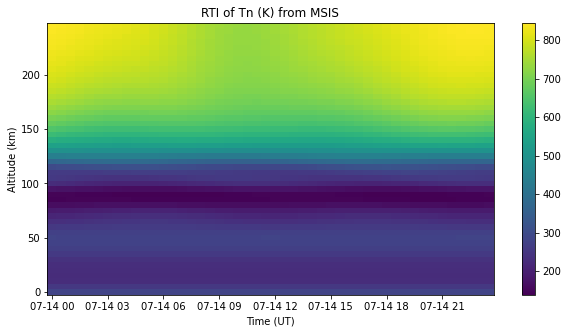

In [11]:
fig,ax = plt.subplots(figsize=(10,5))
pcm = ax.pcolormesh(atmos.coords['time'], atmos.coords['alt_km'],
             atmos.data_vars['Tn'][:,:,0,0].T,shading='auto')
fig.colorbar(pcm)
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Altitude (km)')
ax.set_title(r"RTI of Tn (K) from MSIS");